In [16]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import check_is_fitted

class MultinomialSyntheticDataGenerator(BaseEstimator, ClassifierMixin):
    def __init__(self, random_state=None):
        """
        A custom estimator for generating synthetic data using multinomial logistic regression,
        with the feature distribution inferred from the training data.
        
        Parameters:
        - n_samples (int): Number of synthetic samples to generate.
        - random_state (int): Seed for reproducibility.
        """
        self.random_state = random_state
        np.random.seed(self.random_state)


    def fit(self, X, y):
        """
        Fits a multinomial logistic regression model to the data and estimates the feature distribution.
        
        Parameters:
        - X (ndarray): Feature matrix of shape (n_samples, n_features).
        - y (ndarray): Target labels of shape (n_samples,).
        
        Returns:
        - self: The fitted instance.
        """
        # Store mean and covariance of features
        self.classes_ = np.unique(y)
        self.feature_mean_ = np.mean(X, axis=0)
        self.feature_cov_ = np.cov(X, rowvar=False)
        
        # Fit a logistic regression model
        self.model_ = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=self.random_state)
        self.model_.fit(X, y)
        
        # Store the number of classes and features
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        
        return self

    def predict_proba(self, X):
        """
        Predicts class probabilities for the given feature matrix.
        
        Parameters:
        - X (ndarray): Feature matrix of shape (n_samples, n_features).
        
        Returns:
        - probabilities (ndarray): Predicted probabilities of shape (n_samples, n_classes).
        """
        check_is_fitted(self, "model_")
        return self.model_.predict_proba(X)
    

    def predict(self, X):
        """
        Predicts class probabilities for the given feature matrix.
        
        Parameters:
        - X (ndarray): Feature matrix of shape (n_samples, n_features).
        
        Returns:
        - probabilities (ndarray): Predicted probabilities of shape (n_samples, n_classes).
        """
        check_is_fitted(self, "model_")
        return self.model_.predict(X)

    def generate(self, n):
        """
        Generates synthetic data and labels based on the learned model and feature distribution.
        
        Returns:
        - X_synthetic (ndarray): Generated feature matrix of shape (n_samples, n_features).
        - y_synthetic (ndarray): Generated labels of shape (n_samples,).
        """
        check_is_fitted(self, ["model_", "feature_mean_", "feature_cov_"])
        
        # Generate synthetic features based on the inferred distribution
        X_synthetic = np.random.multivariate_normal(self.feature_mean_, self.feature_cov_, n)
        
        # Compute class probabilities
        P_Y_given_X = self.predict_proba(X_synthetic)
        
        # Sample synthetic labels
        y_synthetic = np.array([np.random.choice(self.n_classes_, p=probs) for probs in P_Y_given_X])
        
        return X_synthetic, y_synthetic
    

    def generate_pairs_in_instance(self, n):
        """
        Generates synthetic data and labels based on the learned model and feature distribution.
        
        Returns:
        - X_synthetic (ndarray): Generated feature matrix of shape (n_samples, n_features).
        - y_synthetic (ndarray): Generated labels of shape (n_samples,).
        """
        check_is_fitted(self, ["model_", "feature_mean_", "feature_cov_"])
        
        # Generate synthetic features based on the inferred distribution
        
        X = np.random.multivariate_normal(self.feature_mean_, self.feature_cov_, n)
        X_pairs = np.repeat(X, repeats=2, axis=0).reshape(-1, 2, X.shape[1])

        y_pairs = np.array([np.random.choice(self.classes_, size=2, replace=False) for _ in range(n)])
        y_pairs = np.expand_dims(y_pairs, -1)

        return X_pairs, y_pairs


    def generate_pairs_cross_instance(self, n):
        """
        Generates synthetic data and labels based on the learned model and feature distribution.
        
        Returns:
        - X_synthetic (ndarray): Generated feature matrix of shape (n_samples, n_features).
        - y_synthetic (ndarray): Generated labels of shape (n_samples,).
        """
        check_is_fitted(self, ["model_", "feature_mean_", "feature_cov_"])
        
        # Generate synthetic features based on the inferred distribution
        
        X = np.random.multivariate_normal(self.feature_mean_, self.feature_cov_, 2*n)
        X_pairs = X.reshape(-1, 2, X.shape[1])
        y_pairs = np.array([np.random.choice(self.classes_, size=2, replace=True) for _ in range(n)])
        y_pairs = np.expand_dims(y_pairs, -1)
        return X_pairs, y_pairs

    # def generate_pair_in_instance(self, n):
    #     """
    #     Generates synthetic data and labels based on the learned model and feature distribution.
        
    #     Returns:
    #     - X_synthetic (ndarray): Generated feature matrix of shape (n_samples, n_features).
    #     - y_synthetic (ndarray): Generated labels of shape (n_samples,).
    #     """
    #     check_is_fitted(self, ["model_", "feature_mean_", "feature_cov_"])
    #     np.random.seed(self.random_state)
        
    #     # Generate synthetic features based on the inferred distribution
    #     X_synthetic = np.random.multivariate_normal(self.feature_mean_, self.feature_cov_, n)
        
    #     # Compute class probabilities
    #     P_Y_given_X = self.predict_proba(X_synthetic)
        
    #     # Sample synthetic labels
    #     y_synthetic = np.array([np.random.choice(self.n_classes_, p=probs) for probs in P_Y_given_X])
        
    #     return X_synthetic, y_synthetic



c:\Users\jonas\anaconda3\envs\cp_rank\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Example synthetic data:
[[-0.81977559  0.68800287 -1.33437886 -0.74365871 -0.18958379]
 [ 0.19355104 -1.75273395  0.2862501  -1.84491431  0.9402858 ]
 [ 0.69646224  0.08634009  0.72842792  0.7497394   0.25595973]
 [ 1.00462312  0.66573599  0.82662688  1.35750653  0.32934607]
 [-2.7783734   1.22425838 -3.02492588 -1.25728919 -1.73747964]]
Example class probabilities:
[[0.54911006 0.37110769 0.07978225]
 [0.17799655 0.35884295 0.4631605 ]
 [0.39500437 0.4586844  0.14631124]
 [0.52274411 0.40671797 0.07053792]
 [0.42946377 0.44013605 0.13040018]]
Example synthetic labels:
[0 1 1 0 0]


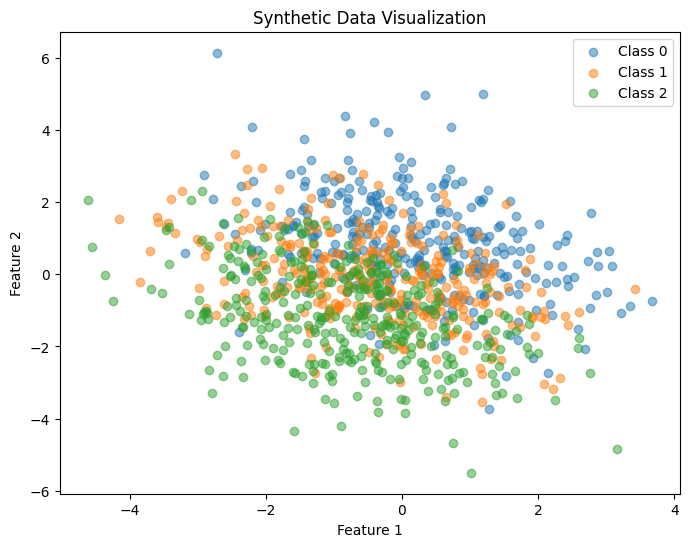

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a small dataset
X_train, y_train = make_classification(
    n_samples=100, n_features=5, n_classes=3, n_informative=3, random_state=42
)

# Initialize and fit the generator
generator = MultinomialSyntheticDataGenerator(random_state=42)
generator.fit(X_train, y_train)

# Generate synthetic data
X_synthetic, y_synthetic = generator.generate(n=1000)

# Predict probabilities for the synthetic data
probs = generator.predict_proba(X_synthetic)

# Print example synthetic data and probabilities
print("Example synthetic data:")
print(X_synthetic[:5])
print("Example class probabilities:")
print(probs[:5])
print("Example synthetic labels:")
print(y_synthetic[:5])

# Visualize the first two features
plt.figure(figsize=(8, 6))
for label in np.unique(y_synthetic):
    mask = y_synthetic == label
    plt.scatter(X_synthetic[mask, 4], X_synthetic[mask, 1], label=f"Class {label}", alpha=0.5)
plt.title("Synthetic Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [18]:
from mapie.classification import MapieClassifier
from mapie.conformity_scores.sets import APSConformityScore

conformity_score = APSConformityScore()

X_cal, y_cal = generator.generate(n=100)

mapie_clf = MapieClassifier(estimator=generator, cv="prefit", conformity_score=conformity_score)


In [19]:
mapie_clf.fit(X_cal, y_cal)

MapieClassifier(conformity_score=<mapie.conformity_scores.sets.aps.APSConformityScore object at 0x0000018BB5C41310>,
                cv='prefit',
                estimator=MultinomialSyntheticDataGenerator(random_state=42))

In [20]:
mapie_clf.conformity_scores_

array([[0.4206725 ],
       [0.50323244],
       [0.38044176],
       [0.88916226],
       [0.34918992],
       [0.2930424 ],
       [0.26858906],
       [0.02356829],
       [0.22449408],
       [0.66148045],
       [0.06148411],
       [0.0676687 ],
       [0.42337993],
       [0.21158499],
       [0.01120303],
       [0.65602924],
       [0.54952637],
       [0.45850833],
       [0.66752185],
       [0.31122599],
       [0.67135167],
       [0.09307366],
       [0.60641202],
       [0.42881947],
       [0.97771635],
       [0.18900503],
       [0.17406264],
       [0.69233328],
       [0.40081032],
       [0.54712798],
       [0.21745318],
       [0.33986611],
       [0.89642164],
       [0.01480338],
       [0.53804366],
       [0.53835388],
       [0.62539386],
       [0.1294356 ],
       [0.60769107],
       [0.35109579],
       [0.38612754],
       [0.37917728],
       [0.15661492],
       [0.72924888],
       [0.59086044],
       [0.62838118],
       [0.39919286],
       [0.556

In [21]:
generator.generate(3)

(array([[ 0.57298885,  0.13712768,  0.75800464,  0.9779539 , -0.00502239],
        [ 0.01922383,  0.8082903 ,  0.88465854,  2.54012306, -1.40929593],
        [-1.761018  ,  2.34752576, -2.73808705, -0.29450474, -1.02449204]]),
 array([1, 1, 0]))

In [22]:
# Compute conformity scores for observation

class OracleAnnotator:
    def __init__(self,mapie_clf):
        self.mapie_clf = mapie_clf
    

    # we assume y is already label encoded
    def get_conformity(self, X, y):
        y_pred_proba = mapie_clf.estimator.predict_proba(X)
        scores = self.mapie_clf.conformity_score_function_.get_conformity_scores(
                        y, y_pred_proba, y_enc=y
                    )
        print(scores)

In [23]:
oracle_annotator = OracleAnnotator(mapie_clf)

In [24]:
from util.ranking_datasets import LabelPairDataset
ds = LabelPairDataset(X_train, y_train, num_classes=len(np.unique(y_train)))
ds

In [25]:
from models.ranking_models import LabelRankingModel
model = LabelRankingModel(input_dim=X_train.shape[1], hidden_dim=X_train.shape[1], output_dim=len(generator.classes_))

In [26]:
from torch.utils.data.dataloader import DataLoader

# X_pairs, y_pairs = generator.generate_pairs_cross_instance(12)
# ds.create_from_numpy_pairs(X_pairs, y_pairs)

ds = LabelPairDataset(X_train, y_train, num_classes=len(generator.classes_))

pair_loader = DataLoader(ds, batch_size=2)

model._fit(pair_loader, val_loader=None)

In [27]:
X,y =  generator.generate_pairs_cross_instance(16)


TypeError: cannot unpack non-iterable numpy.int32 object